In [35]:
from playsound import playsound
from pydub import AudioSegment
from pydub.utils import mediainfo
from scipy import signal
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [24]:
path = 'fma_small/000/*.mp3'
music = [AudioSegment.from_file(files) for files in glob(path)]

/Users/wjr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


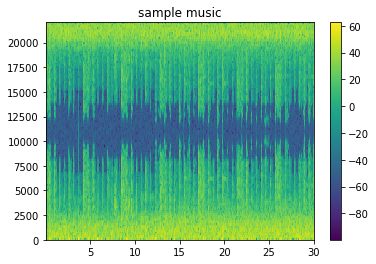

In [82]:
sample = np.array(music[0].get_array_of_samples())
sample = sample[:int(len(sample)/2)] #get left channel only
Fs = music[0].frame_rate
spec, freqs, bins, im = plt.specgram(sample, Fs=Fs)
plt.colorbar()
plt.title('sample music')
plt.show()

In [92]:
tag = mediainfo('fma_small/000/000002.mp3')
NORM = np.amax(spec)

In [94]:
WIDTH = 128
HEIGHT = 10240
INTERVAL = 1

train_data = []
for i in range(len(music)):
    temp = np.array(music[i].get_array_of_samples())
    if len(temp) > Fs*35:
        temp = temp[:int(len(temp)/2)] #get left channel only
    spec, freqs, bins, im = plt.specgram(temp, Fs=Fs)
    spec = spec[:WIDTH, :HEIGHT] #truncate to power of 2
    train_data.append(spec)

/Users/wjr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


In [95]:
train_data = np.asarray(train_data)
train_data = train_data.astype(np.float32)
train_data.shape

(62, 128, 10240)